 # Forest Fires in Canada : A detailed Overview and Analysis

25th April 2024
<br>
Gregory Bazuaye


Forest fires are a significant natural disturbance in Canada, impacting ecological processes, economic resources, and human health.  These fires can range in size and intensity, with some playing a vital role in maintaining healthy ecosystems by clearing dead vegetation and promoting regeneration. However, large and intense fires can have devastating consequences, causing property damage, loss of life, and air quality deterioration. Understanding the patterns and drivers of forest fires in Canada is crucial for effective fire management strategies that balance ecological needs with public safety and economic considerations.

This Jupyter Notebook delves into a dataset of forest fires in Canada. We will analyze this data to gain insights into various aspects of these fires, including:

Spatial distribution: Examining where forest fires tend to occur more frequently across Canada.
Temporal patterns: Analyzing seasonal trends and identifying months with higher fire activity.
Relationships between fire characteristics: Investigating potential correlations between factors like temperature, precipitation, and fire size or intensity.
Through this analysis, we aim to uncover valuable insights that can inform forest fire prevention, preparedness, and response efforts in Canada.

* The data is from a CSV file


 The data was acquired through the following link
 
 
 
 **Description of the dataset**
 
1. X - x-axis coordinate within the Monteshino park map : ranged from 1 to 9
 <br>

2. Y - y-axis coordinate within the Monteshino park map : ranged from 2 to 9
 <br>

3. Month - Month of the year 'Jan to Dec'
 <br>

4. Day - Day of the week 'mon to sun'
 <br>

5. FFMC - FFMC Index from the FWI System  ranging from 18.7 to 96.20 . The FFMC or Fine Fuel Moisture Code, is a number used in the Canadian Forest Fire Weather Index (FWI) System to indicate the moisture content of litter and other cured fine fuels on the forest floor.
   <br>

6. DMC - DMC Index from the FWI System ranging from 1.1 to 291.3 . The DMC (Duff Mosture Code) reflects the moisture content of deeper organic layers of the forest floor, specifically the layer of partially decomposed organic matter known as duff.
  <br>

7. DC - DC Index from the FWI System ranging from 7.9 to 860.6 . The DC (Drought Code) reflects the long-term moisture deficit in the forest floor and deeper soil layers. Here's a breakdown of its role in fire risk assessment .
  <br>

8. ISI - ISI index from the FWI system ranging from 0.0 to 56.10. The ISI (Initial Spread Index)  is another component of the Canadian Forest Fire Weather Index System (FWI System). It reflects the rate at which a fire can spread under specific weather conditions.
  <br>
9. temp - temperature in Celsius degrees: 2.2 to 33.30
  <br>

10. RH - relative humidity in %: 15.0 to 100
  <br>

11. wind - wind speed in km/h: 0.40 to 9.40
  <br>

12. rain - outside rain in mm/m2 : 0.0 to 6.4
  <br>

13. area - the burned area of the forest (in ha): 0.00 to 1090.84

## 0.1.1 Importing Important Libraries

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
%matplotlib inline

## 0.1.2 Reading the Dataset

In [2]:
file_path =  r'C:\Users\Elguion09\Downloads\forestfires.csv'
dataset = pd.read_csv(file_path)

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [3]:
dataset.shape

(517, 13)

There are 517 entries in the dataset

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
cat_data = dataset.select_dtypes('object').columns.to_list()
num_data = dataset.columns.to_list()

for col in cat_data:
    num_data.remove(col)


print('the categoraical columns in the dataset are: ', cat_data)
print('the numerical columns in the dataset are: ', num_data)


the categoraical columns in the dataset are:  ['month', 'day']
the numerical columns in the dataset are:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']


##  0.1.3 Data Preprocessing

In [12]:
dataset.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [15]:
dataset.duplicated().sum() 

4

In [16]:
dataset[dataset.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
53,4,3,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,0.00
100,3,4,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,0.00
215,4,4,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,28.66
303,3,6,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,0.00


In [17]:
data_no_dup = dataset.copy()
data_no_dup.drop_duplicates(inplace = True)
data_no_dup[data_no_dup.duplicated()]

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area


In [18]:
data_no_dup.shape

(513, 13)

The 4 entries have been removed bringing down the number of rows (data points) from 517 to 513

In [20]:
data_no_dup.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000
mean,4.678363,4.300195,90.637427,110.989279,549.155166,9.023587,18.887524,44.348928,4.010526,0.021832,12.891598
std,2.320059,1.230925,5.540920,64.191013,247.724594,4.575543,5.828128,16.358803,1.796613,0.297107,63.892586
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,440.900000,6.400000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.500000,8.400000,19.300000,42.000000,4.000000,0.000000,0.540000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,11.000000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000



**0.1.4 Interprtation of Descriptive Statistics**

**Spatial Coordinates (X & Y):**

* The average X and Y coordinates (4.67 and 4.30, respectively) have moderate standard deviations (2.32 and 1.23). While this tells us the data points are spread out around the average, it doesn't necessarily mean lower tolerance. 
* The central tendency of X and Y might suggest more fires in the park's center. However, to confirm this, it would be helpful to visualize the data distribution on a map (e.g., scatter plot) to see how the fire locations are spread across the park.

**Fire Indices:**

* The Fine Fuel Moisture Code (FFMC) has a high average (90.64) with a low standard deviation (5.54), indicating drier fine fuels on the forest floor (litter and other cured materials). This suggests a higher fire risk due to less moisture in these readily ignitable fuels.
* The Duff Moisture Code (DMC) has a high average (110.99) but also a high standard deviation (64.19). This means the data points are spread out around the average, reducing our confidence in the exact average value. However, the high average still suggests drier conditions in the deeper organic layer (duff) of the forest floor, which can contribute to more intense and longer-lasting fires.

**Weather:**

* The average temperature (18.87°C) is fairly high. As expected, higher temperatures are associated with an increased risk of fires.
* The very low average rainfall (4.35 mm) logically corresponds to a higher likelihood of fires. Less rainfall translates to drier conditions and more flammable fuels.

**Land Area:**

* The average land area burned (12.89 hectares) has a very high standard deviation (63.89 hectares). This significant difference suggests the average might be heavily influenced by a few large fires (outliers). Visualizing the data distribution (e.g., histogram) would help confirm this and provide a clearer picture of the typical fire sizes. We could avert this by taking the logarithm of this feature and adding 1 (to avoid zeros) .

**Overall:**

These descriptive statistics provide valuable insights into potential fire risk factors in the park. By considering additional factors like wind speed, topography, and vegetation type, and potentially visualizing the data, we can create a more comprehensive fire risk assessment for the park.


In [22]:
data_no_dup.describe(include = ['object'])

,month,day
count,513,513
unique,12,7
top,aug,sun
freq,182,94


• It is necessary to transform the outcome ‘area’ by taking its logarithm (after adding 1 to avoid
zeros)
<br>
<br>
• Log-area = log10(area + 1)

In [25]:
data_no_dup['log-area'] = np.log(data_no_dup['area'] + 1)

## 0.1.5 Data Visualisation

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>,
        <Axes: title={'center': 'log-area'}>]], dtype=object)

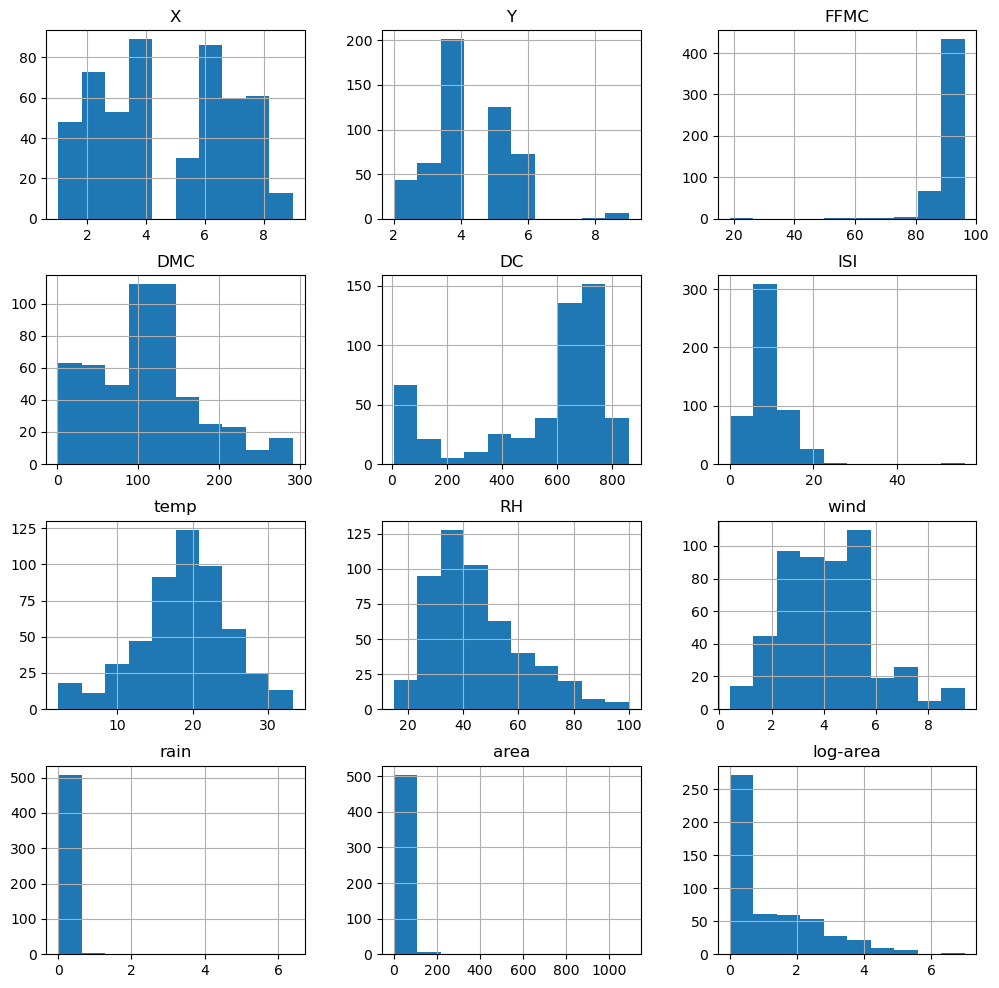

In [26]:
data_no_dup.hist(figsize = (12,12))

<Axes: >

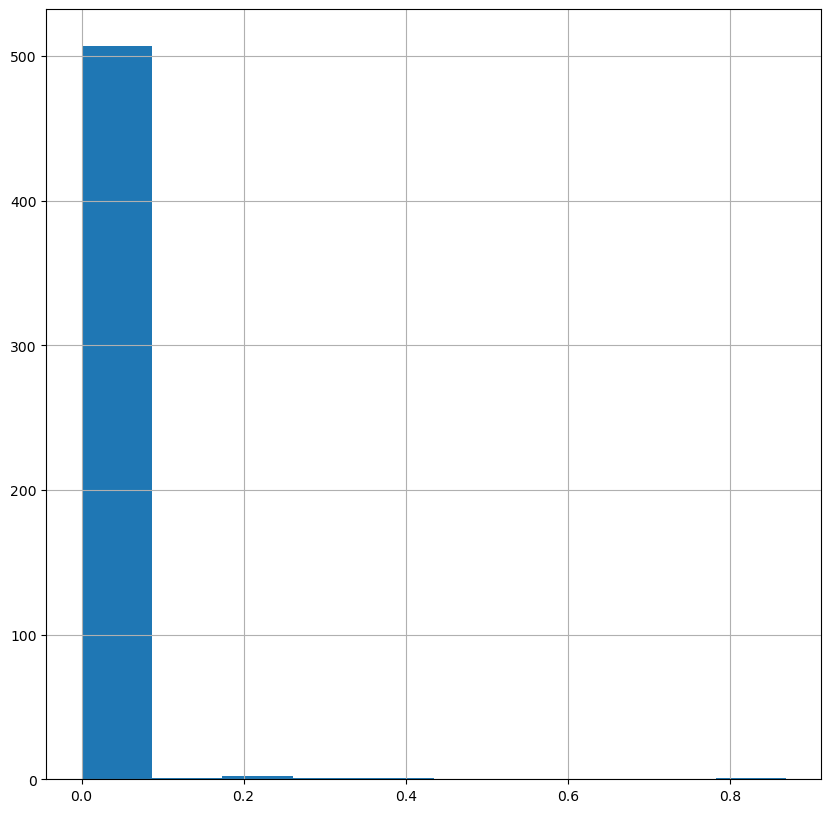

In [40]:
data_no_dup['log-rain'] = np.log10(data_no_dup['rain'] + 1)

data_no_dup['log-rain'].hist(figsize=(10 , 10))

ValueError: num must be an integer with 1 <= num <= 10, not 11

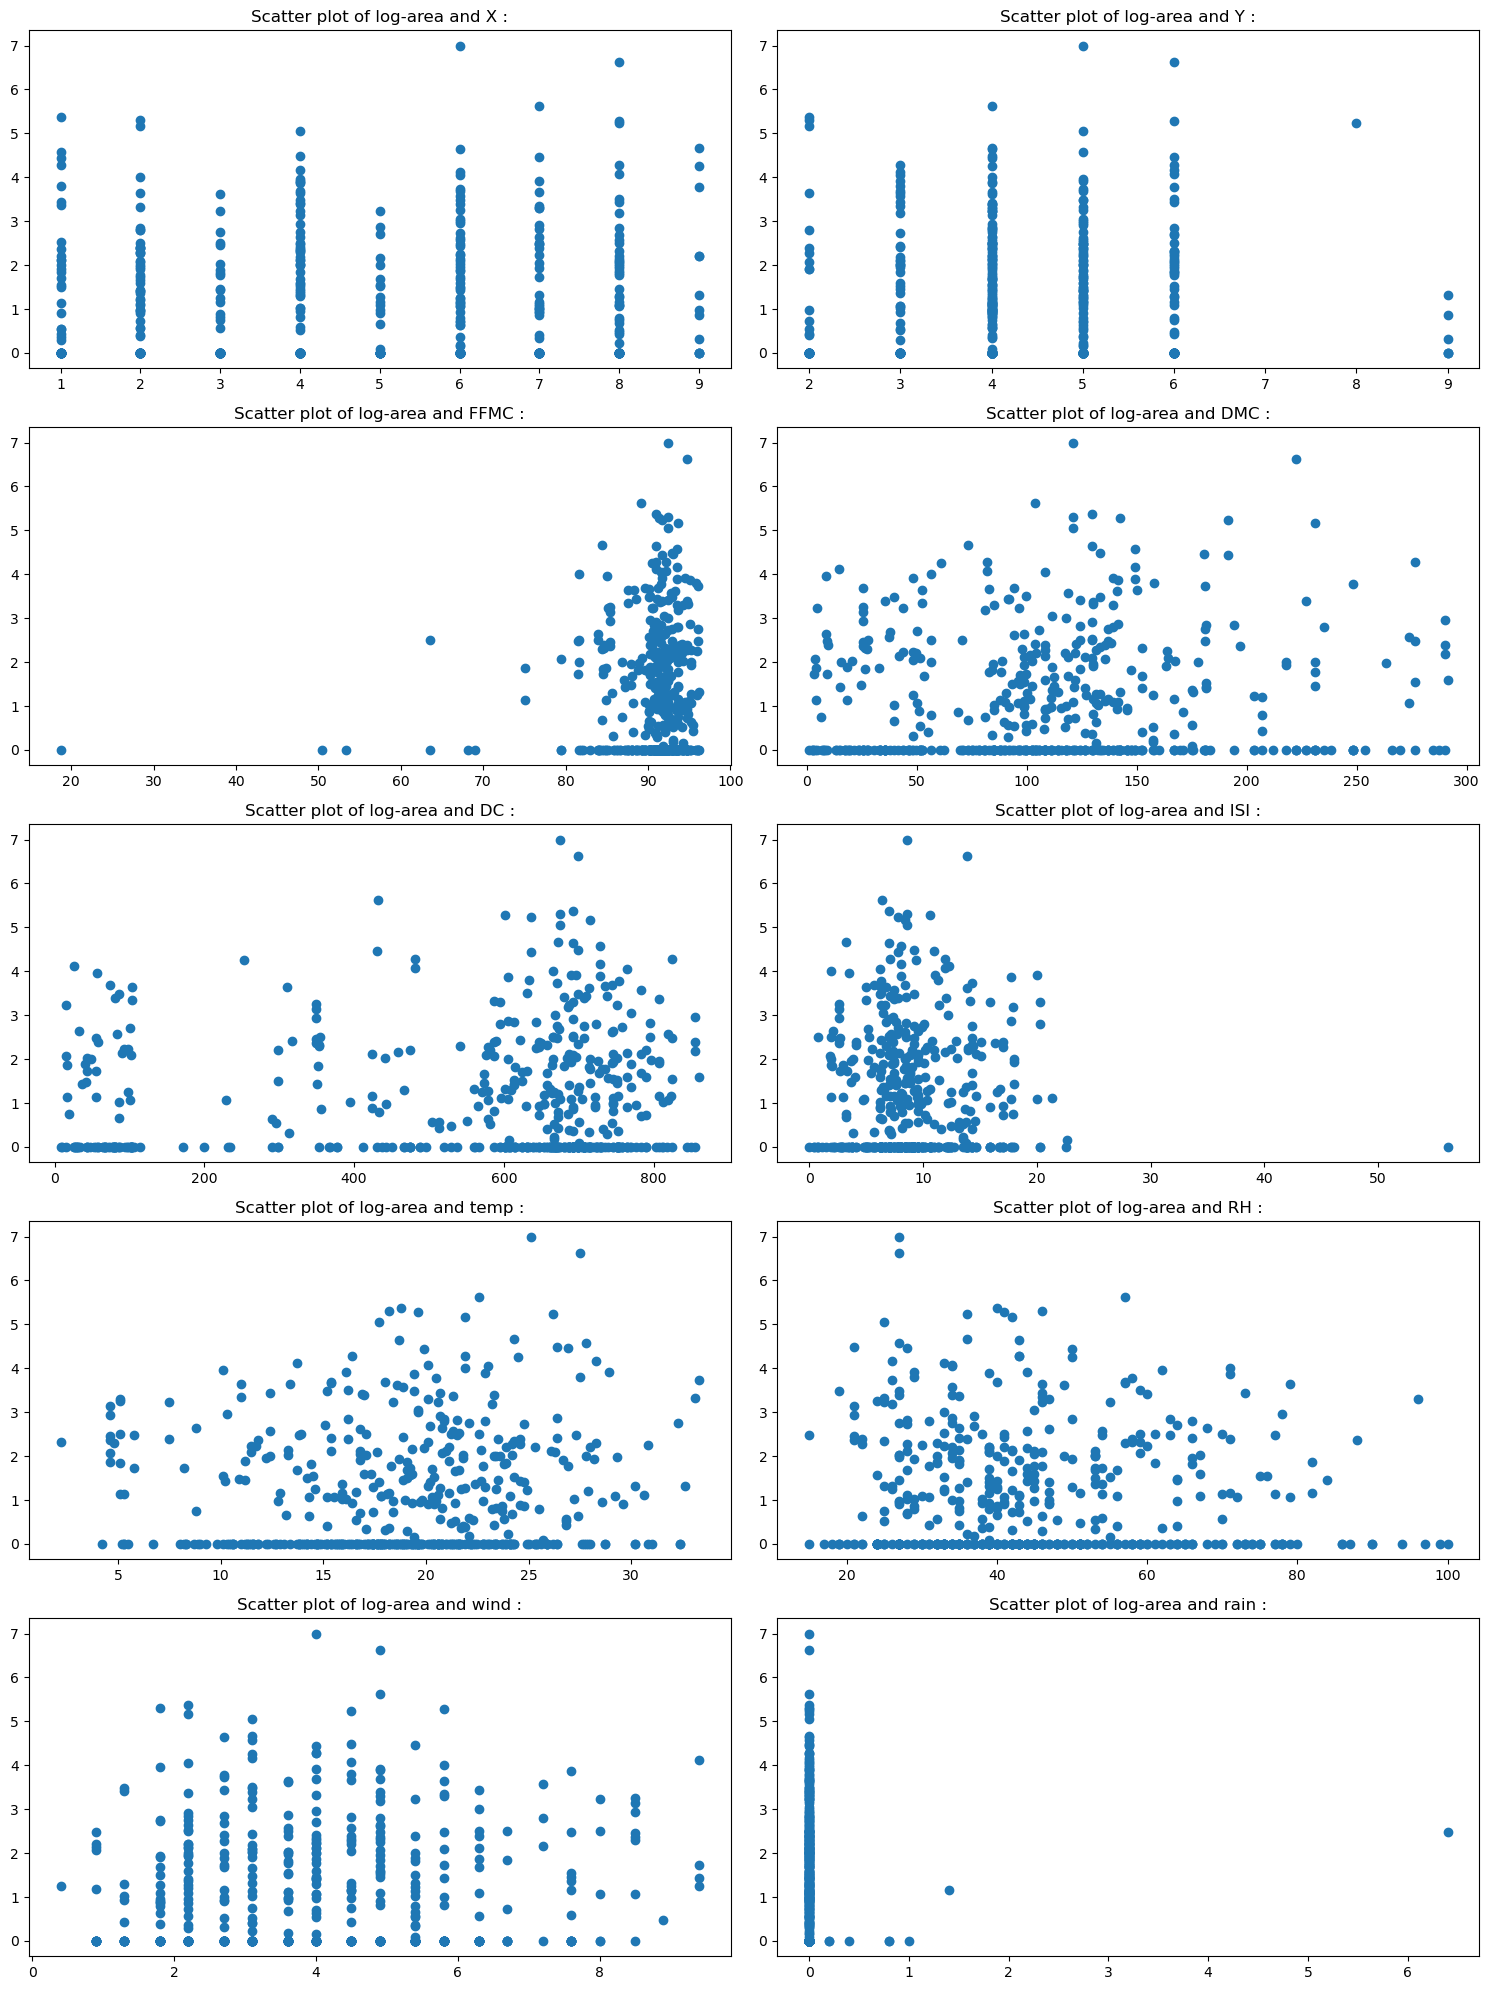

In [33]:

plt.figure(figsize = (15, 20))

for i, col in enumerate(data_no_dup[num_data].columns, 1):
  plt.subplot(5, 2, i)
  plt.title(f'Scatter plot of log-area and {col} :')
  plt.scatter(data_no_dup[col], data_no_dup['log-area'])


  plt.tight_layout()

 **Plot Interpretation**

- From the plot it is now clear that the area feature is significantly is significantly skewed as a result of the enormous scale . The logarithm was taken for better visualisation and more accurately capturing the relationship between the other variables and area

<br>

- Fires are more frequent in the Western Region of the country which could be due to the warmer and drier climate as a result of the Rocky Mountains blocking moisture from the Pacific Ocean . Another reason could be the corniferous nature of vegetation



- The most frequent temperature for the fires is about 20 degrees celsius
<br>

- The FFMC plots clearly show that most fires occur when the soil has a high index is a result of dryness.
<br>

- For most fires the wind speed falls in the range of 4-6 Km/h which could suggest that such winds in that range could help spread fires as they provide more oxygen for combustion , winds of greater intensity could hinder the spread of fires as they could scatter embers too widely and wind speeds below that miht not provide enough oxygen as well as a result of other factors and variables

<br>

- The average rainfall is very low even with a low standard deviation which suggests that most fires happen which tallies with the high FFMC index

<br>

- The relative humidities are relatively low which could suggest dryness being a factor for the forest fires
<br>



- It could be said (tentatively) that most fires occur in months when the weather is really dry

Text(0.5, 1.0, 'Correlation Heatmap')

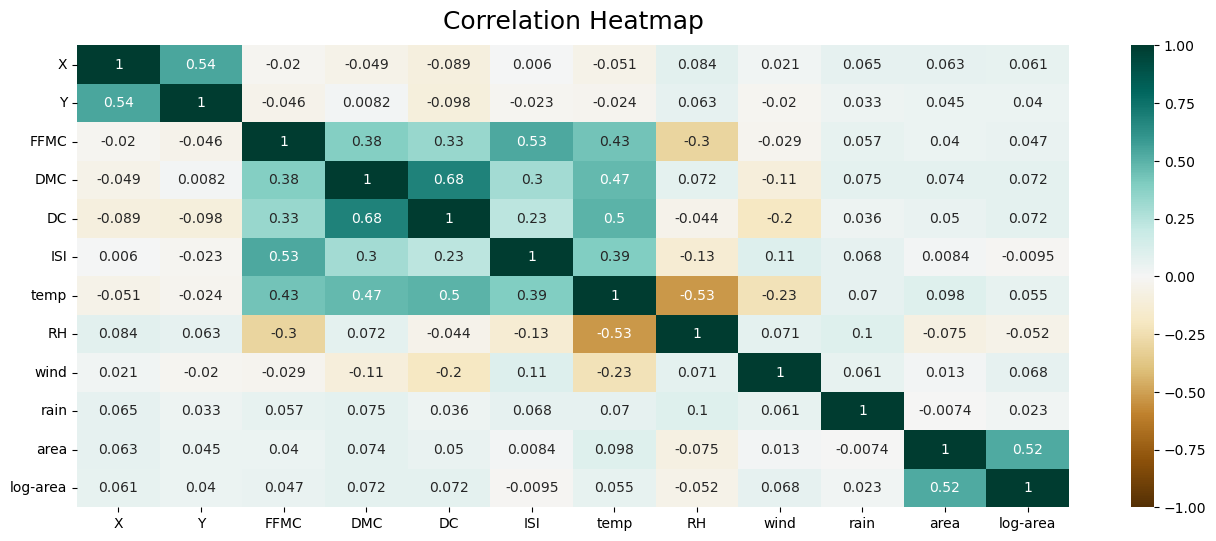

In [39]:
import seaborn as sns


dataset_temp = data_no_dup.copy()

dataset_temp.drop(columns = ['day' , 'month' ]  , inplace = True)
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(dataset_temp.corr(), vmin = -1, vmax = 1, annot = True, cmap ='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize': 18}, pad = 12)

There seems to be no significant correlation with area and any of the other variables

<br>
<br>

- However , there is a somewhat strong positive correlation between DMC and DC indices as a result of wjat  both variables represent :
    
    
    DMC: Represents the moisture content of the deeper organic layer of forest soil (duff layer). Higher DMC values indicate drier duff.
        <br>
    DC: Represents a short-term moisture deficit, often calculated based on recent weather conditions. Higher DC values indicate drier conditions in the recent past.

<Axes: >

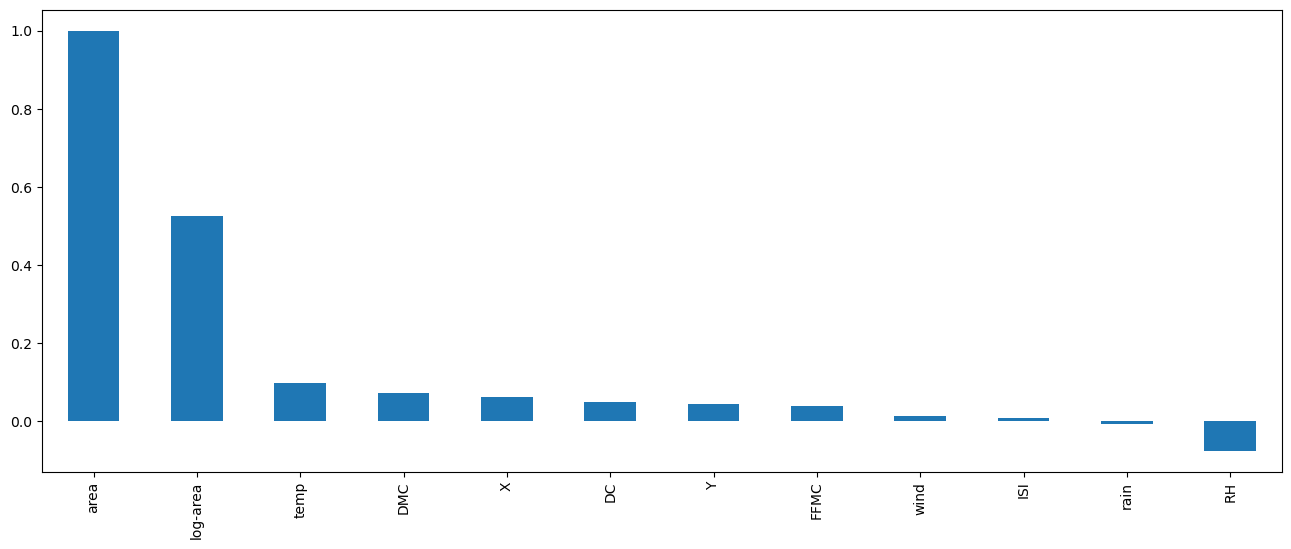

In [45]:
plt.figure(figsize = (16, 6))
dataset_temp.corr()['area'].sort_values(ascending = False).plot(kind = 'bar')

## Univariate Analysis 

Skew: 12.802213419146321
Kurtosis: 192.73391233370953


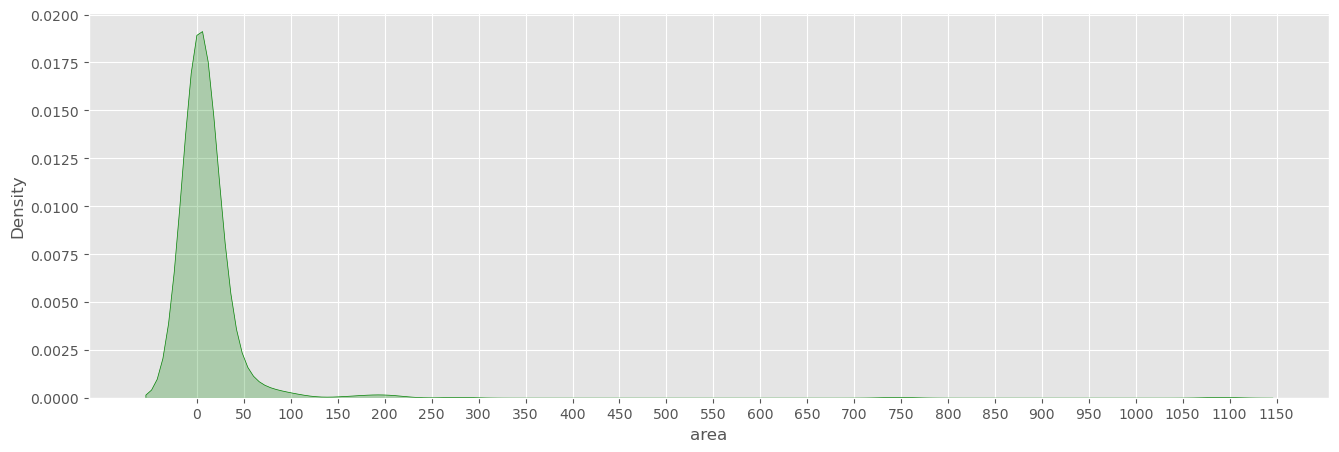

In [49]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] =  9,5
plt.figure(figsize = (16,5))
print("Skew: {}".format(data_no_dup['area'].skew()))
print("Kurtosis: {}".format(data_no_dup['area'].kurtosis()))
ax = sns.kdeplot(data_no_dup['area'],shade = True, color = 'g')
plt.xticks([i for i in range(0, 1200, 50)])
plt.show()




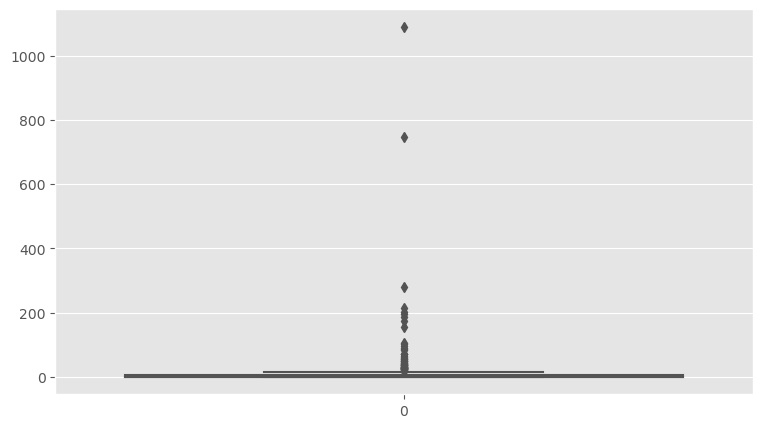

In [50]:
ax = sns.boxplot(data_no_dup['area'])

**Few observations:**

-The data is highly skewed with a value of +12.84 and huge kurtosis value of 194.
<br>
-It even tells you that majority of the forest fires do not cover a large area, most of the damaged
area is under 50 hectares of land.
<br>

-We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse
transform before submitting the output.
<br>

Outlier Check: There are 4 outlier instances in our area columns but the questions is should we
drop it or not? (Will get back to this in the outlier treatment step)


In [55]:
from scipy.stats import zscore
y_outliers = data_no_dup[abs(zscore(data_no_dup['area']))>=3] 

y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log-area,log-rain
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88,5.365415,0.0
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84,6.995620,0.0
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28,6.616440,0.0
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53,5.633110,0.0


Skew: 19.739514983669345
Kurtosis: 418.0348304321986


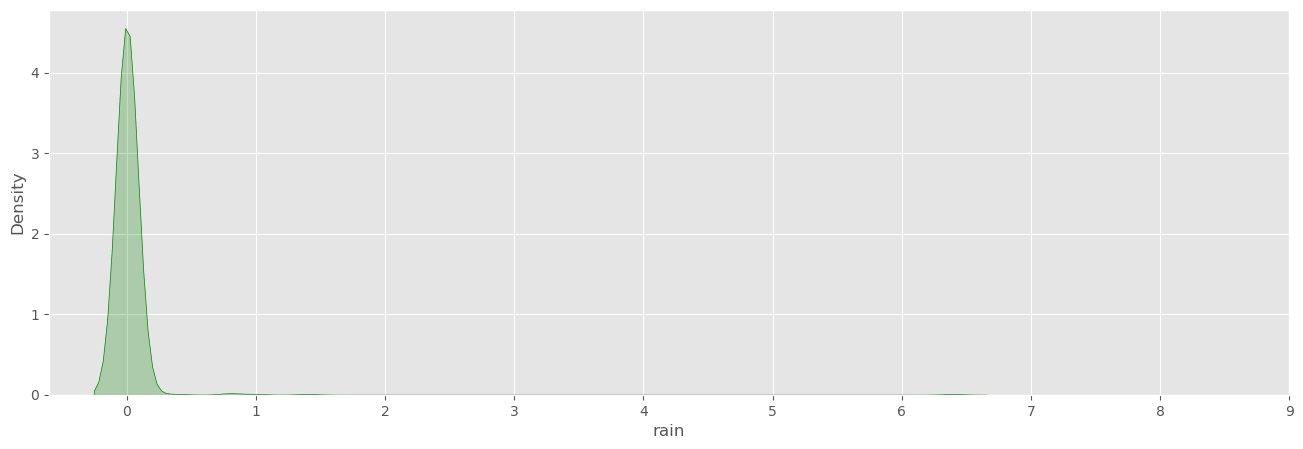

In [62]:
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = 9,5
plt.figure(figsize = (16, 5))
print("Skew: {}".format(data_no_dup['rain'].skew()))
print("Kurtosis: {}".format(data_no_dup['rain'].kurtosis()))
ax = sns.kdeplot(data_no_dup['rain'],shade = True, color = 'g')
plt.xticks([i for i in range(0, 10)])
plt.show()

**Few observations:**

-The data is highly skewed with a value of +19.84 and huge kurtosis value of 418.
<br>
-We can confirm that the most fires occur when there is little to no rainfall
<br>

-We can apply tranformation to fix the skewnesss and kurtosis, however we will have to inverse
transform before submitting the output.
<br>




In [64]:
from scipy.stats import zscore
y_outliers = data_no_dup[abs(zscore(data_no_dup['rain']))>=3] 

y_outliers

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log-area,log-rain
243,7,4,aug,sun,91.8,175.1,700.7,13.8,21.9,73,7.6,1.0,0.00,0.000000,0.301030
499,7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82,2.469793,0.869232
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17,1.153732,0.380211


There are 3 outliers that show that forest fires could occur when there is higher rainfall

## Analysing Categorical Columns

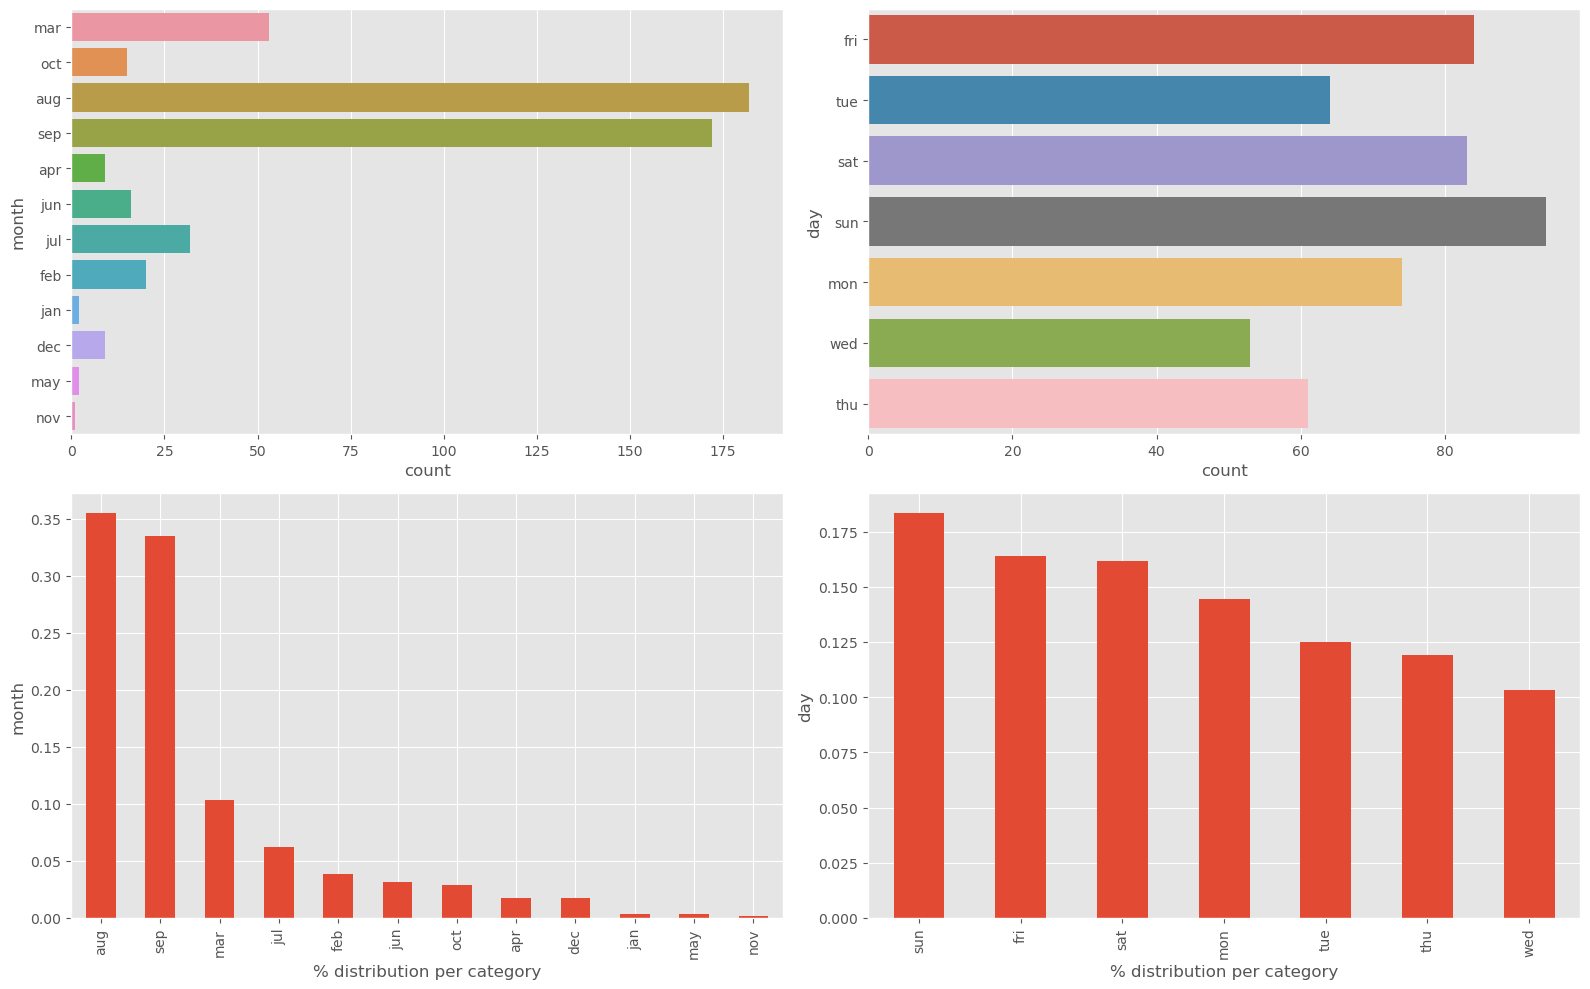

In [67]:
plt.figure(figsize = (16, 10))

for i,col in enumerate(cat_data, 1):
 plt.subplot(2, 2, i)
 sns.countplot(data = data_no_dup.drop('area', axis = 1), y = col)
 plt.subplot(2, 2, i+2)
 data_no_dup[col].value_counts(normalize = True).plot.bar()
 plt.ylabel(col)
 plt.xlabel('% distribution per category')

    
plt.tight_layout()
 
plt.show()

• It is interesting to see that abnormally high number of the forest fires occur in the month of
August and September.
<br>

• In the case of day, the days Friday to Monday have higher proportion of case

## Analysing Numerical Columns

Using Kernel Density Plot curves to show the distiribution of the **continuous** numerical variables

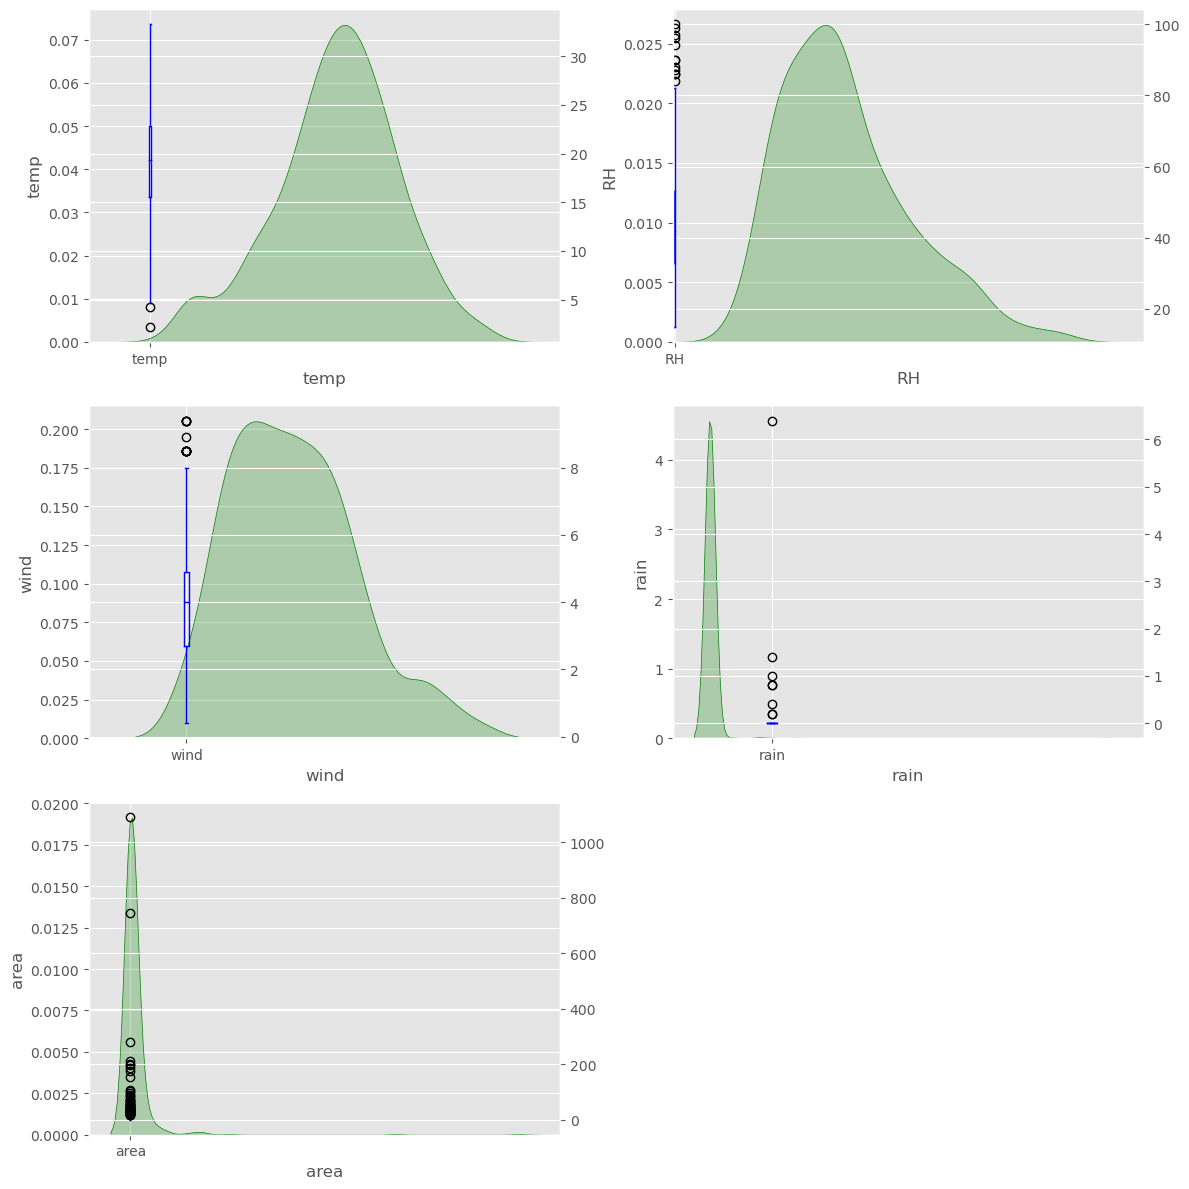

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
skewness,0.025954,0.415768,-6.548903,0.545526,-1.111406,2.528218,-0.329215,0.854413,0.581191,19.739515,12.802213
kurtosis,-1.179535,1.430430,66.530072,0.193154,-0.216474,21.302313,0.113899,0.414890,0.052614,418.034830,192.733912


In [75]:
non_cont_data = ['X' ,'Y' , 'FFMC' ,'DMC' , 'DC' , 'ISI']
cont_data = [var  for var in num_data if var not in non_cont_data]

rows = int((len(cont_data) + 1) / 2) 
cols = 2  
plt.figure(figsize=(12, rows * 4))  
for i, col in enumerate(cont_data, 1):
    plt.subplot(rows, cols, i)
    sns.kdeplot(data_no_dup[col], color='g', shade=True)
    plt.ylabel(col) 

    plt.twinx()  
    data_no_dup[col].plot.box(color='b')
    plt.xlabel(col)  # Label x-axis with variable name (bottom)

plt.tight_layout()
plt.show()
nums = data_no_dup[num_data]
pd.DataFrame(data=[nums.skew(), nums.kurtosis()], index = ['skewness','kurtosis'])

### Outliers, Skewness and kurtosis (high positive or negative) was observed in the following columns:
<br>

•  FFMC
<br>
<br>
•  ISI
<br>
<br>
•  rain


## Bivariate Analysis

In [78]:
# categorical variable based on forest fire area damage
#(No damage), (low),(moderate), (high), (very high)
def area_cat(area):
 if area == 0.0:
  return "No damage"
 elif area <= 1:
  return "low"
 elif area <= 25:
  return "moderate"
 elif area <= 100:
  return "high"
 else:
  return "very high"

data_no_dup['damage_category'] = data_no_dup['area'].apply(area_cat)
data_no_dup.sample(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,log-area,log-rain,damage_category
213,7,3,mar,mon,87.6,52.2,103.8,5.0,11.0,46,5.8,0.0,27.35,3.344627,0.0,high
122,3,4,sep,sun,92.4,124.1,680.7,8.5,22.5,42,5.4,0.0,0.00,0.000000,0.0,No damage
414,5,4,aug,sun,93.6,235.1,723.1,10.1,24.1,50,4.0,0.0,0.00,0.000000,0.0,No damage
404,2,4,sep,wed,87.9,84.8,725.1,3.7,21.8,34,2.2,0.0,6.04,1.951608,0.0,moderate
66,2,2,sep,fri,92.4,117.9,668.0,12.2,23.0,37,4.5,0.0,0.00,0.000000,0.0,No damage


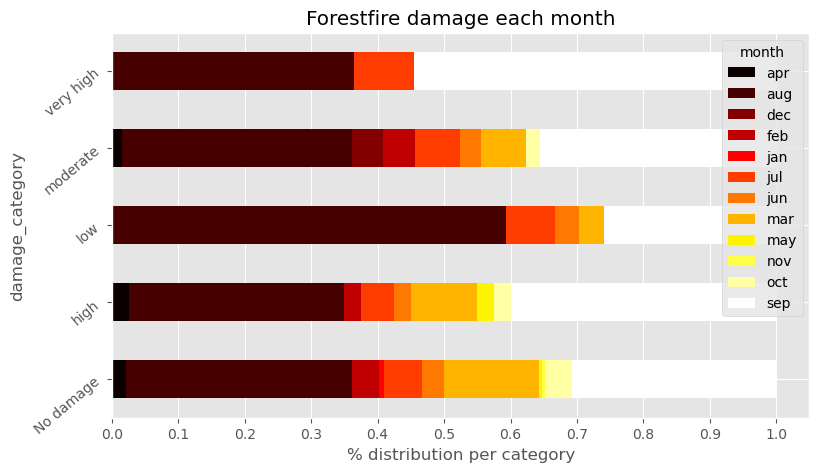

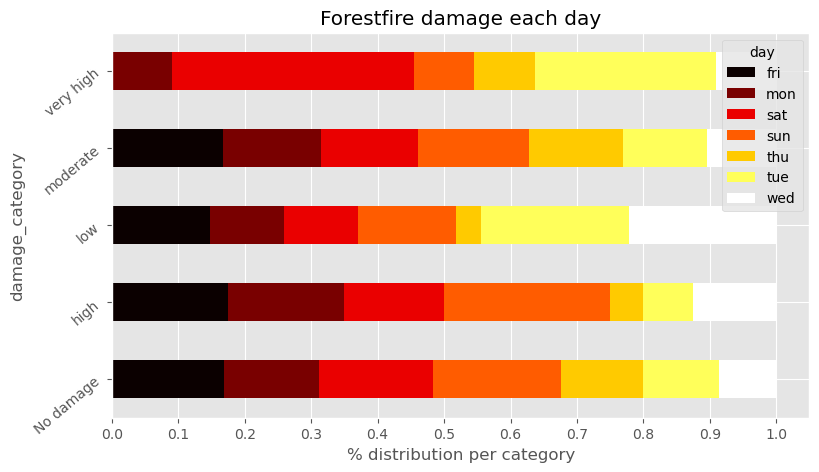

In [81]:
# categorical columns
for col in cat_data:

 cross =pd.crosstab(index= data_no_dup['damage_category'] , columns = data_no_dup[col] , normalize ='index')
 cross.plot.barh(stacked=True , rot=40 , cmap = 'hot')
 plt.xlabel('% distribution per category')
 plt.xticks(np.arange(0, 1.1, 0.1))
 plt.title("Forestfire damage each {}".format(col))

plt.show()
    

**Previously we had observed that August and September had the most number of forest fires.
And from the above plot of month, we can understand few things**
<br>
– Most of the fires in August were low (< 1 hectare).
<br>
– The very high damages(>100 hectares) happened in only 3 months - august,july and
september.
<br>
• Regarding fire damage per day, nothing much can be observed. Except that, there were no
very high damaging fires on Friday and on Saturdays it has been reported most.

**Fire Size Seasonality:**

August Dominance: Most fires in the dataset seem to occur in August, suggesting a peak fire season during that month. This could be due to factors like hotter and drier conditions typical of summer months in Canada.
Fire Damage Severity:

Concentration in Specific Months: Very high fire damage events (fires exceeding 100 hectares) appear to be concentrated in just three months: July, August, and September. This reinforces the connection between peak fire season and the occurrence of larger, more destructive fires.
Fire Damage Day of Week:


There isn't a strong observable trend regarding fire damage per day of the week. However, there's a notable absence of very high damage fires reported on Fridays. This might be due to reduced human activity or reporting on weekends, requiring further investigation. Interestingly, Saturdays seem to have the most reports, but it's unclear if this refers to fire starts .



There's a strong possibility that weather plays a role in the increased fire risk during these months. Here's how weather conditions might be contributing:

Temperature: Hotter summer months can lead to drier vegetation, which acts as fuel for fires and makes them more likely to spread rapidly.
<br>
<br>
Precipitation: Lower precipitation levels during these months can further dry out vegetation and create drought conditions, further increasing fire risk.

<br>
Wind: Strong winds can fan existing fires and make them more difficult to control.


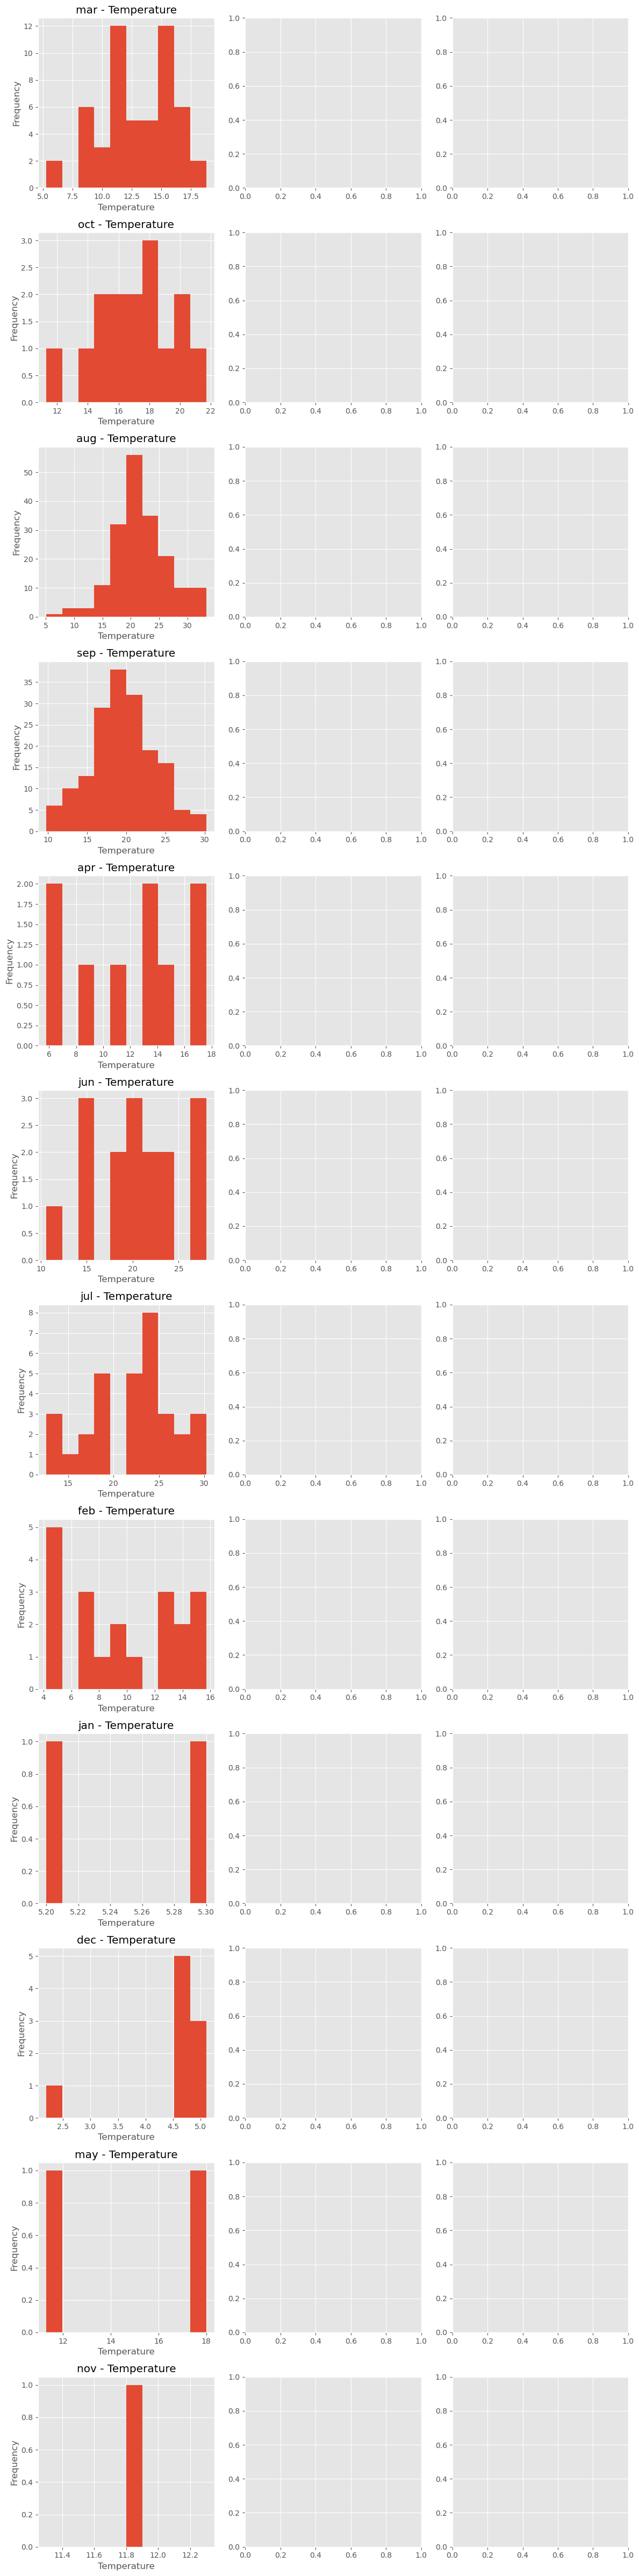

In [85]:
months = data_no_dup['month'].unique()  # Get unique month names

fig, axes = plt.subplots(nrows=len(months), ncols=3, figsize=(12, len(months) * 4))  # Adjust figsize as needed

# Loop through each month and corresponding subplot positions
for i, month in enumerate(months):
    month_data = data_no_dup.loc[data_no_dup['month'] == month]  # Filter data for current month

    # Temperature on subplot 0 (left column)
    axes[i, 0].hist(month_data['temp'])
    axes[i, 0].set_title(f"{month} - Temperature")
    axes[i, 0].set_xlabel('Temperature')
    axes[i, 0].set_ylabel('Frequency')

  
    
   

plt.tight_layout()
plt.show()


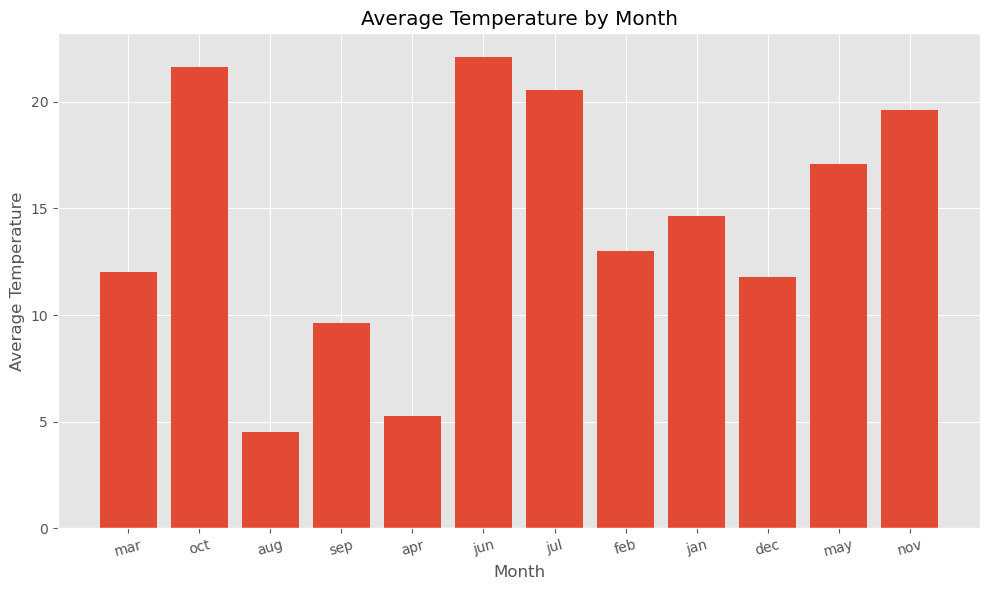

In [88]:
months = data_no_dup['month'].unique()  # Get unique month names

plt.figure(figsize=(10, 6))

# Calculate average temperature per month
average_temp_per_month = data_no_dup.groupby('month')['temp'].mean()

# Bar chart with months on x-axis and average temperature on y-axis
plt.bar(months, average_temp_per_month)
plt.xlabel('Month')
plt.ylabel('Average Temperature')
plt.title('Average Temperature by Month')
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

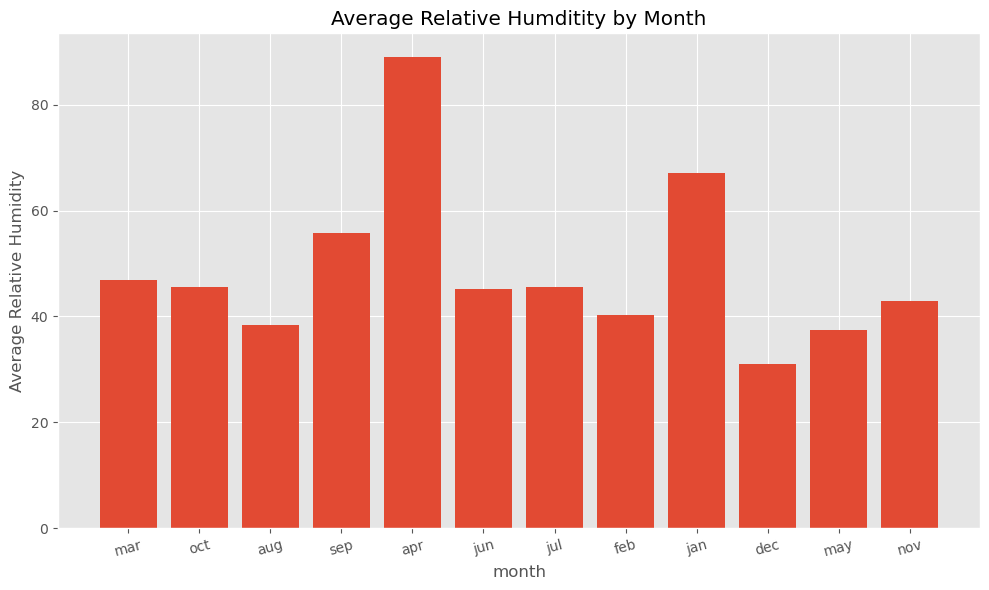

In [90]:
months = data_no_dup['month'].unique()  # Get unique month names

plt.figure(figsize=(10, 6))

# Calculate average temperature per month
average_rh_per_month = data_no_dup.groupby('month')['RH'].mean()

# Bar chart with months on x-axis and average temperature on y-axis
plt.bar(months, average_rh_per_month)
plt.xlabel('month')
plt.ylabel('Average Relative Humidity')
plt.title('Average Relative Humditity by Month')
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

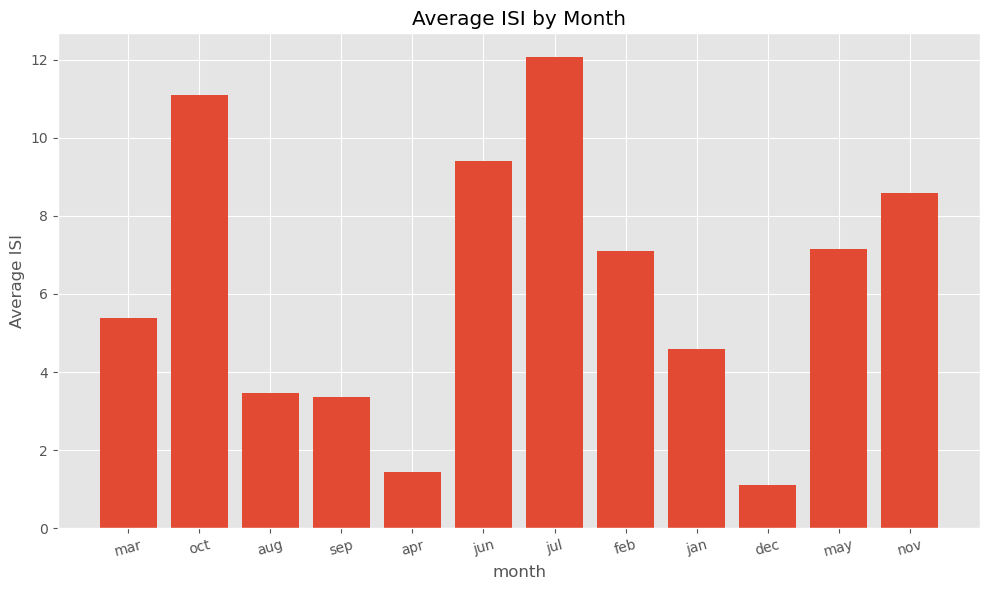

In [91]:
months = data_no_dup['month'].unique()  # Get unique month names

plt.figure(figsize=(10, 6))

# Calculate average temperature per month
average_isi_per_month = data_no_dup.groupby('month')['ISI'].mean()

# Bar chart with months on x-axis and average temperature on y-axis
plt.bar(months, average_isi_per_month)
plt.xlabel('month')
plt.ylabel('Average ISI')
plt.title('Average ISI by Month')
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

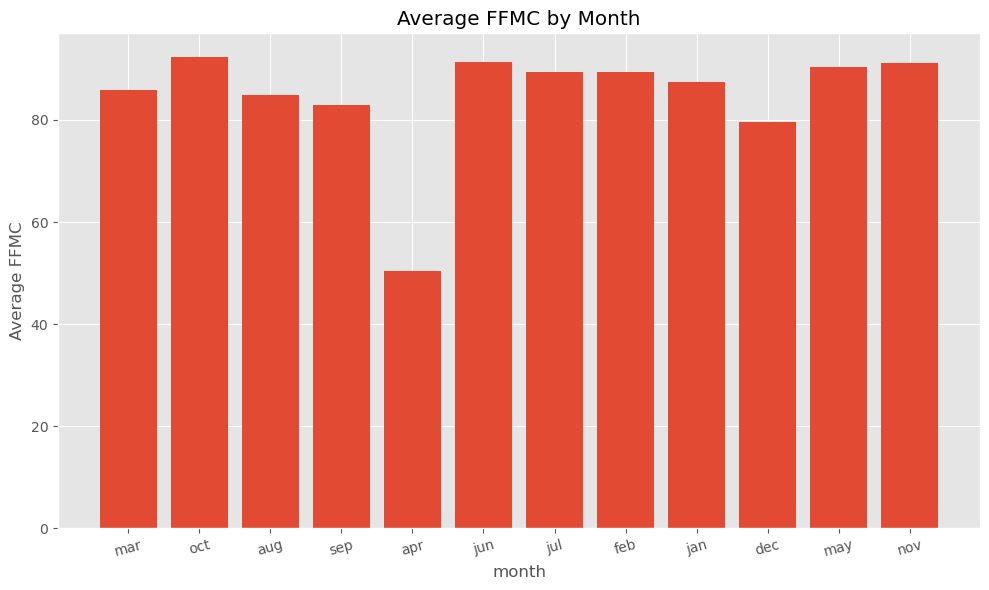

In [109]:
months = data_no_dup['month'].unique()  # Get unique month names

plt.figure(figsize=(10, 6))

# Calculate average temperature per month
average_isi_per_month = data_no_dup.groupby('month')['FFMC'].mean()

# Bar chart with months on x-axis and average temperature on y-axis
plt.bar(months, average_isi_per_month)
plt.xlabel('month')
plt.ylabel('Average FFMC')
plt.title('Average FFMC by Month')
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

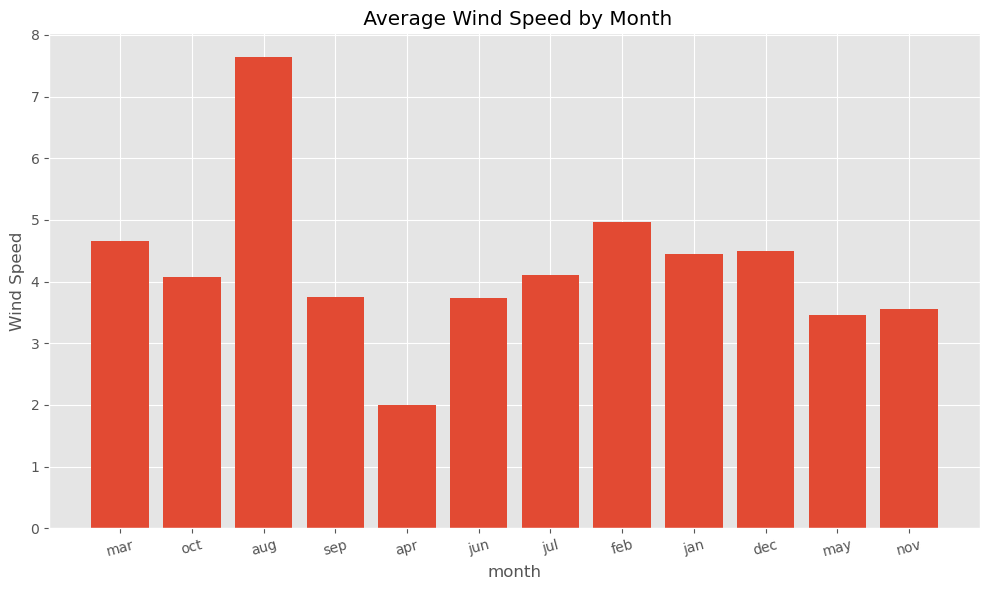

In [92]:
months = data_no_dup['month'].unique()  # Get unique month names

plt.figure(figsize=(10, 6))

# Calculate average temperature per month
average_rh_per_month = data_no_dup.groupby('month')['wind'].mean()

# Bar chart with months on x-axis and average temperature on y-axis
plt.bar(months, average_rh_per_month)
plt.xlabel('month')
plt.ylabel('Wind Speed' )
plt.title( ' Average Wind Speed by Month')
plt.xticks(rotation=15)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From the following plots we see that
- The months september , august and april have the highest  ISI which could indicates how easily a fire could spread
- The three months where very high damage occured have relatively high wind speeds and moderate relative humidities

- The months with high damage fires have relatively high average temperatures , high average ISI and low relative humidities

- There is no clear correlation between the frequency of fires and average temperature

- April which has one of the highest frequency occurrences has one of the highest average relative humidities which could suggest that relative humidity alone does not influence the probability of fires


We can see that the combination of factors like low relative humidity , high average wind speeds and high temperature have some influence the occurence of forest fires

Other factors such as lightning strikes are not included in the dataset and is also one of the main causes of forest fires . Therefore , these factors alone would not be sufficient as the plots suggest to predict accurately the ocurrences of fires

## 0.1.5 Outlier treatment
We had observed outliers in the following columns:
<br>
•  Area
<br>
•  FFMC
<br>
•  ISI
<br>
• Rain
<br>
– However, the above outliers are not error values so we cannot remove it.
– In order to minimize the effect of outliers in our model we will transform the above
features.


In [94]:
out_columns = ['area','FFMC','ISI','rain']
df = pd.get_dummies(data_no_dup, columns=['day','month'], drop_first = True)
print(np.log1p(df[out_columns]).skew())
print('-'*20)
print(np.log1p(df[out_columns]).kurtosis())


area     1.219398
FFMC   -11.630232
ISI     -0.931885
rain    14.117710
dtype: float64
--------------------
area      0.961880
FFMC    184.053886
ISI       2.546805
rain    232.413847
dtype: float64


In [95]:
# FFMC and rain are still having high skew and kurtosis values,
# since we will be using Linear regression model we cannot operate with such␣ high values
# so for FFMC we can remove the outliers in them using z-score method
mask = df.loc[:, ['FFMC']].apply(zscore).abs() < 3
# Since most of the values in rain are 0.0, we can convert it as a categorical␣column
df['rain'] = df['rain'].apply(lambda x: int(x > 0.0))
df = df[mask.values]
df.shape

(506, 31)

In [96]:
out_columns.remove('rain')
df[out_columns] = np.log1p(df[out_columns])
df[out_columns].skew()


area    1.210025
FFMC   -1.794148
ISI    -0.431279
dtype: float64

In [127]:
df_ml = df.drop(columns =['damage_category']).copy()


In [128]:
df_ml.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0,...,False,False,False,False,False,True,False,False,False,False
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0,...,False,False,False,False,False,False,False,False,True,False
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0,...,False,False,False,False,False,False,False,False,True,False
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,1,...,False,False,False,False,False,True,False,False,False,False
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0,...,False,False,False,False,False,True,False,False,False,False


In [129]:
def month_encoding (month):
    if month == True :
      return 1
    else:
     return 0

    
    


In [130]:
month_columns = ['month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 
                 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']

for col in month_columns:
  df_ml[col] = df_ml[col].apply(month_encoding)

In [131]:
df_ml.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,7,5,4.468204,26.2,94.3,1.808289,8.2,51,6.7,0,...,0,0,0,0,0,1,0,0,0,0
1,7,4,4.517431,35.4,669.1,2.041220,18.0,33,0.9,0,...,0,0,0,0,0,0,0,0,1,0
2,7,4,4.517431,43.7,686.9,2.041220,14.6,33,1.3,0,...,0,0,0,0,0,0,0,0,1,0
3,8,6,4.529368,33.3,77.5,2.302585,8.3,97,4.0,1,...,0,0,0,0,0,1,0,0,0,0
4,8,6,4.503137,51.3,102.2,2.360854,11.4,99,1.8,0,...,0,0,0,0,0,1,0,0,0,0


## 0.1.6 Model Building

In [140]:
inputs = df_ml.drop(['area', 'log-area' , 'DC' ,'log-rain' ], axis = 1)
target = df_ml['log-area']
inputs.shape


(506, 26)

In [108]:
df_ml.ddinfo()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 0 to 516
Data columns (total 30 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          506 non-null    int64  
 1   Y          506 non-null    int64  
 2   FFMC       506 non-null    float64
 3   DMC        506 non-null    float64
 4   DC         506 non-null    float64
 5   ISI        506 non-null    float64
 6   temp       506 non-null    float64
 7   RH         506 non-null    int64  
 8   wind       506 non-null    float64
 9   rain       506 non-null    int64  
 10  area       506 non-null    float64
 11  log-area   506 non-null    float64
 12  log-rain   506 non-null    float64
 13  day_mon    506 non-null    bool   
 14  day_sat    506 non-null    bool   
 15  day_sun    506 non-null    bool   
 16  day_thu    506 non-null    bool   
 17  day_tue    506 non-null    bool   
 18  day_wed    506 non-null    bool   
 19  month_aug  506 non-null    int64  
 20  month_dec  506 

In [141]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(inputs, target, test_size= 0.25, random_state = 42)


x_train.shape, x_test.shape


((379, 26), (127, 26))

In [142]:
# Defining REC (regression error charcteristics)
def rec(m, n, tol):
  if type(m) != 'numpy.ndarray':
      m = np.array(m)
  if type(n) != 'numpy.ndarray':
      n = np.array(n)
  l = m.size #Assigning m.size to l
  percent = 0
  for i in range(l):
      if np.abs(10 ** m[i] - 10 ** n[i]) <= tol:
        percent += 1
  return 100 * (percent / l)
   


In [143]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
params = {
'max_depth': [5, 10, 15, 20, 50], 'max_leaf_nodes': [2, 5, 10],'min_samples_leaf': [2, 5, 10],
'min_samples_split':[2, 5, 10]
}
grid_rf = GridSearchCV(RandomForestRegressor(), param_grid = params, refit =True, verbose = 0, cv = 5)
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15, 20, 50],
                         'max_leaf_nodes': [2, 5, 10],
                         'min_samples_leaf': [2, 5, 10],
                         'min_samples_split': [2, 5, 10]})

In [144]:
print("Best parameters obtained by Grid Search:",grid_rf.best_params_)



Best parameters obtained by Grid Search: {'max_depth': 50, 'max_leaf_nodes': 2, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [145]:
from sklearn.metrics import mean_squared_error
a = grid_rf.predict(x_test)
print("RMSE for Random Forest:", np.sqrt(mean_squared_error(y_test, a)))

RMSE for Random Forest: 1.4159352310490365


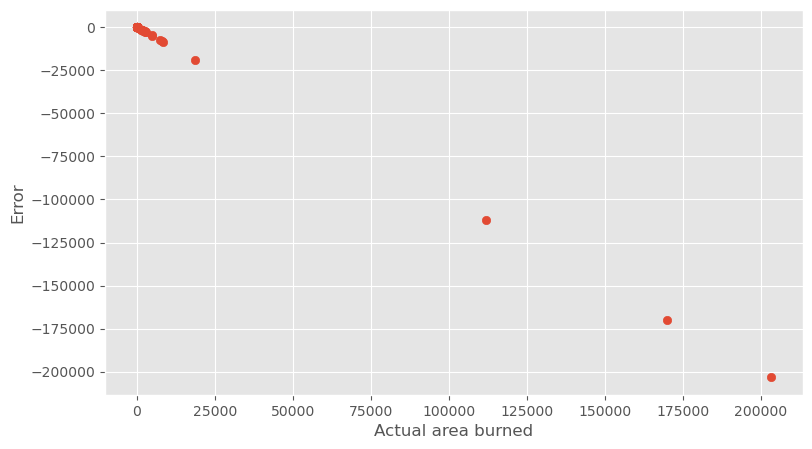

In [146]:
# Scatter plot to show actual area burned and error
plt.xlabel("Actual area burned")
plt.ylabel("Error")
plt.grid(True)
plt.scatter(10 ** (y_test), 10 ** (a) - 10 ** (y_test))


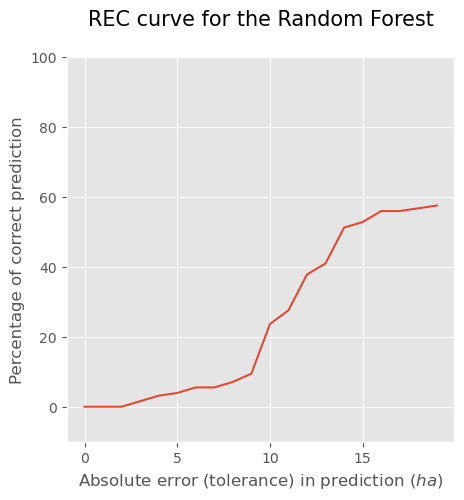

In [147]:
rec_RF=[]
for i in range(20):
  rec_RF.append(rec(a, y_test, i))
plt.figure(figsize=(5,5))
plt.title("REC curve for the Random Forest\n",fontsize = 15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0, 20 + 1, 5)])
plt.ylim(-10, 100)
plt.yticks([i * 20 for i in range(6)])
plt.grid(True)
plt.plot(range(20), rec_RF)


## Linear Regression

In [148]:
 from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [151]:
 y_pred = lm.predict(x_test)
print('RMSE for Linear Regression: ',np.sqrt(mean_squared_error(y_test,y_pred)))


RMSE for Linear Regression:  1.4301513482589105


In [152]:
mean_squared_error(y_test, y_pred)

2.0453328789267795

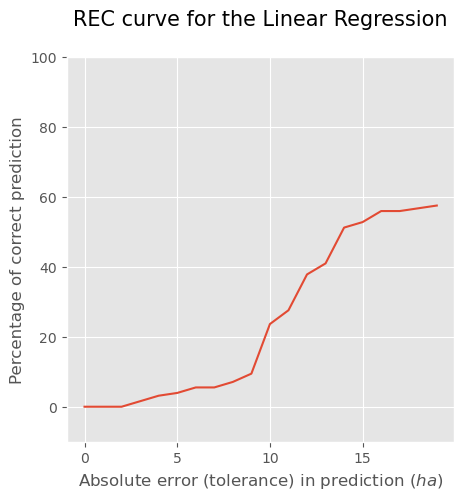

In [154]:
rec_lm=[]
for i in range(20):
  rec_lm.append(rec(y_pred, y_test, i))
plt.figure(figsize=(5 ,5))
plt.title("REC curve for the Linear Regression\n",fontsize = 15)
plt.xlabel("Absolute error (tolerance) in prediction ($ha$)")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i for i in range(0, 20 + 1, 5)])
plt.ylim(-10, 100)
plt.yticks([i * 20 for i in range(6)])
plt.grid(True)
plt.plot(range(20), rec_RF)

## Neural Network


In [155]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow import keras

In [156]:
model = Sequential([
keras.layers.Dense(100, input_dim = 27, activation = 'relu'),
keras.layers.Dense(150, activation = 'relu'),
keras.layers.Dense(150, activation = 'relu'),
keras.layers.Dense(150, activation = 'relu'),
keras.layers.Dense(150, activation = 'relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(100, activation = 'relu'),
keras.layers.Dense(100, activation = 'relu'),
keras.layers.Dropout(0.3),
keras.layers.Dense(50, activation = 'relu'),
keras.layers.Dense(1)
])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2800      
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               

2024-04-09 05:02:13.782905: E
tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:267] failed call to
cuInit: CUDA_ERROR_UNKNOWN: unknown error
2024-04-09 05:02:13.783162: I
tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving
CUDA diagnostic information for host: abdelmoneim-Dell-G15-5510
2024-04-09 05:02:13.783171: I
tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:176] hostname:
abdelmoneim-Dell-G15-5510
2024-04-09 05:02:13.783747: I
tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda
reported version is: 470.239.6
2024-04-09 05:02:13.784369: I
tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:204] kernel
reported version is: 470.239.6
2024-04-09 05:02:13.784380: I
tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:310] kernel
version seems to match DSO: 470.239.6
27
2024-04-09 05:02:13.787971: I tensorflow/core/platform/cpu_feature_guard.cc:193]
This TensorFlow binary is optimized with oneAPI Deep Neural Network Library
(oneDNN) to use the following CPU instructions in performance-critical
operations: AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate
compiler flags.